In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [11]:
img = cv2.imread("E:\PADHAE\Jupyter\IMPORTANT_PROJECTS\Face Recognization Using OpenCV\model\TestImages\IMG_20200517_190443_579.jpg")

In [12]:
img.shape

(3750, 3000, 3)

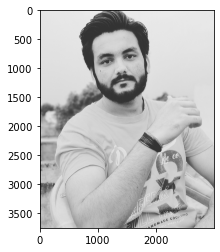

In [13]:
plt.imshow(img)

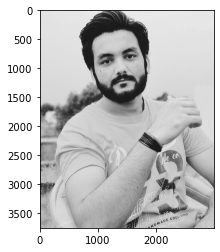

In [14]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

# Detecting face and making a rectangle around the face

In [16]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img,1.3,5)

In [17]:
faces

array([[ 760,  329, 1222, 1222]], dtype=int32)

In [18]:
(x,y,w,h) = faces[0]
x,y,w,h

(760, 329, 1222, 1222)

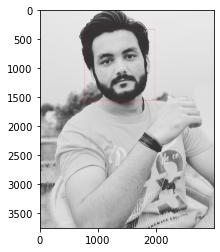

In [19]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #x,y are the position where face starts i.e. rectangle dimensions 
# (0,0,255) are the parameters of colour i.e. rgb RedGrayBlue
plt.imshow(face_img)

# Detecting eyes and making squares/rectangles around eyes

In [20]:
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(img,1.3,5)

In [21]:
eyes

array([[1019,  769,  241,  241],
       [1420,  700,  215,  215],
       [2141, 3426,   90,   90],
       [2111, 3438,   85,   85],
       [  70, 2635,  101,  101],
       [ 219, 2649,   46,   46]], dtype=int32)

In [22]:
(ex,ey,ew,eh) = eyes[0]  #ex,ey...ew are nothing but dimensions where eyes starts
ex,ey,ew,eh

(1019, 769, 241, 241)

Since we have more than one eye we use for loop here

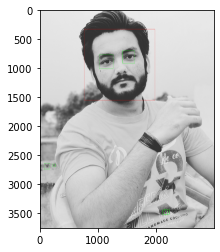

In [23]:
for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(img)

Function for detecting face and eyes

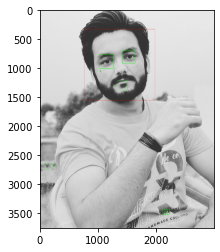

In [24]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]  #This gives us a image of face only i.e a cropped face image
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        for i in range(0,2):
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

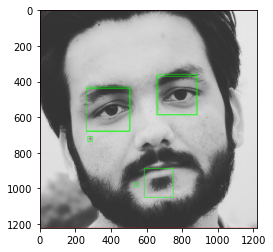

In [25]:
plt.imshow(roi_color,cmap='gray')

In [26]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

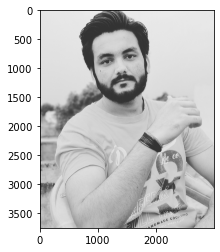

In [29]:
original_image = cv2.imread("E:\PADHAE\Jupyter\IMPORTANT_PROJECTS\Face Recognization Using OpenCV\model\TestImages\IMG_20200517_190443_579.jpg")
plt.imshow(original_image)

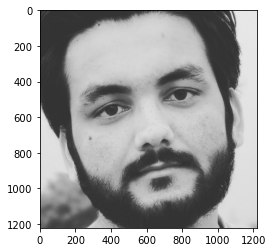

In [32]:
cropped_image = get_cropped_image_if_2_eyes("E:\PADHAE\Jupyter\IMPORTANT_PROJECTS\Face Recognization Using OpenCV\model\TestImages\IMG_20200517_190443_579.jpg")
plt.imshow(cropped_image)

# Applying code on our DataSet folders

In [39]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/zcropped/"

In [40]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [41]:
img_dirs

['./Dataset/aditya_pratap',
 './Dataset/akash_malik',
 './Dataset/amisha_gupta',
 './Dataset/deepak_malik',
 './Dataset/harsh_vardhan',
 './Dataset/piyush_rathi']

In [42]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [43]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

aditya_pratap
Generating cropped images in folder:  ./Dataset/zcropped/aditya_pratap
akash_malik
Generating cropped images in folder:  ./Dataset/zcropped/akash_malik
amisha_gupta
Generating cropped images in folder:  ./Dataset/zcropped/amisha_gupta
deepak_malik
Generating cropped images in folder:  ./Dataset/zcropped/deepak_malik
harsh_vardhan
Generating cropped images in folder:  ./Dataset/zcropped/harsh_vardhan
piyush_rathi
Generating cropped images in folder:  ./Dataset/zcropped/piyush_rathi


# Doing Wavelet transformation on the cropped images i.e. Doing feature extraction

Wavelet transformation is very very important for feature extraction for computer it helps in detecting nose lips ,etc

In [44]:
import numpy as np
import pywt  #Library used for wavelet transformation 
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

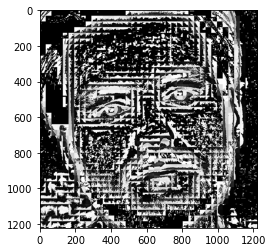

In [45]:
im_har = w2d(cropped_image ,'db1',5)
plt.imshow(im_har, cmap='gray')

In [46]:
celebrity_file_names_dict

{'aditya_pratap': ['./Dataset/zcropped/aditya_pratap/aditya_pratap1.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap2.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap3.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap4.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap5.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap6.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap7.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap8.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap9.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap10.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap11.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap12.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap13.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap14.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap15.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap16.png',
  './Dataset/zcropped/aditya_pratap/aditya_pratap17.png',
  './D

In [47]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'aditya_pratap': 0,
 'akash_malik': 1,
 'amisha_gupta': 2,
 'deepak_malik': 3,
 'harsh_vardhan': 4,
 'piyush_rathi': 5}

In [48]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [49]:
len(X[0])

4096

In [50]:
X[0]

array([[184],
       [162],
       [117],
       ...,
       [  2],
       [243],
       [ 64]], dtype=uint8)

In [51]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(186, 4096)

In [52]:
X[0]

array([184., 162., 117., ...,   2., 243.,  64.])

# Applying Machine Learning Models

Applying SVM

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7021276595744681

In [55]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.74      0.93      0.82        15
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         6
           4       0.50      0.60      0.55        10
           5       0.57      0.50      0.53         8

    accuracy                           0.70        47
   macro avg       0.80      0.68      0.71        47
weighted avg       0.74      0.70      0.70        47



Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [57]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

<IPython.core.display.Javascript object>

In [58]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.783862,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.654497,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.704762,{'logisticregression__C': 1}


In [59]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='linear', max_iter=-1,
                      probability=True, random_state=None, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False), 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                    

In [60]:
best_estimators['svm'].score(X_test,y_test)

0.7659574468085106

In [61]:
best_estimators['random_forest'].score(X_test,y_test)

0.5106382978723404

In [62]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6808510638297872

In [63]:
best_clf = best_estimators['svm']

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 2,  0,  0,  2,  1,  0],
       [ 1, 14,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  1],
       [ 0,  1,  0,  0,  7,  2],
       [ 0,  2,  0,  0,  1,  5]], dtype=int64)

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(69.0, 0.5, 'Truth')

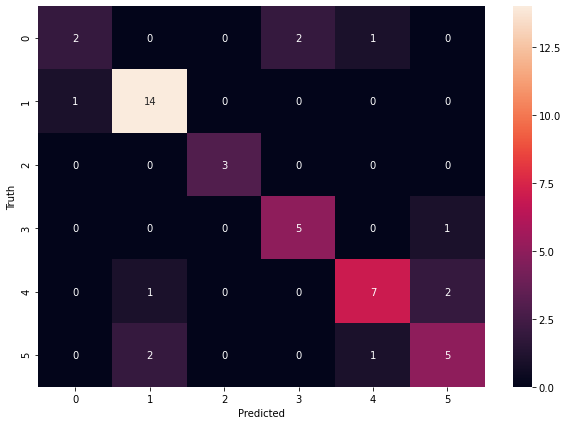

In [65]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
class_dict

{'aditya_pratap': 0,
 'akash_malik': 1,
 'amisha_gupta': 2,
 'deepak_malik': 3,
 'harsh_vardhan': 4,
 'piyush_rathi': 5}

# Save the trained model

In [67]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

# Save class dictionary

In [68]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))